# Data Scraping from Website

In [1]:
# Import libraries
from bs4 import BeautifulSoup
import requests

In [2]:
# Content parsing from the website
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url) 
soup = BeautifulSoup(page.text, 'html') 

In [3]:
# Representing beautifully
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of largest companies in the United States by revenue - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinne

In [4]:
# Finding Tables
soup.find_all('table') 

[<table class="wikitable sortable">
 <caption>
 </caption>
 <tbody><tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">648,125
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" sty

In [5]:
# Indexing the table required
table = soup.find_all('table')[0]

In [6]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [7]:
titles = table.find_all('th') #headers

In [8]:
titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [9]:
# Get titles for table
table_titles = [title.text.strip() for title in titles]
print(table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [10]:
# Import libraries
import pandas as pd

In [11]:
df = pd.DataFrame(columns = table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [12]:
column_data = table.find_all('tr')

In [13]:
# Looping data from each row in dataframe
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    #print(individual_row_data)
    length = len(df)
    df.loc[length] = individual_row_data

In [14]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [15]:
df.to_csv(r'C:\Users\gauta\Documents\Projects\Web Data Scraping\Companies.csv', index = False)

In [16]:
load_data = pd.read_csv("Companies.csv")

In [17]:
# Data Cleaning & Preparation
load_data["Revenue (USD millions)"] = load_data["Revenue (USD millions)"].str.replace(",", "").astype(float)
load_data["Revenue growth"] = load_data["Revenue growth"].str.replace("%", "").astype(float)
load_data["Employees"] = load_data["Employees"].str.replace(",", "").astype(int)

# Revenue Growth Insights

In [18]:
# Sort by Revenue Growth
growth_sorted = load_data.sort_values(by="Revenue growth", ascending=False)

In [19]:
# Calculate Average Growth by Industry
industry_growth = load_data.groupby("Industry")["Revenue growth"].mean().sort_values(ascending=False)

In [20]:
# Top and Bottom Performers
top_growth = growth_sorted.head(5)
bottom_growth = growth_sorted.tail(5)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

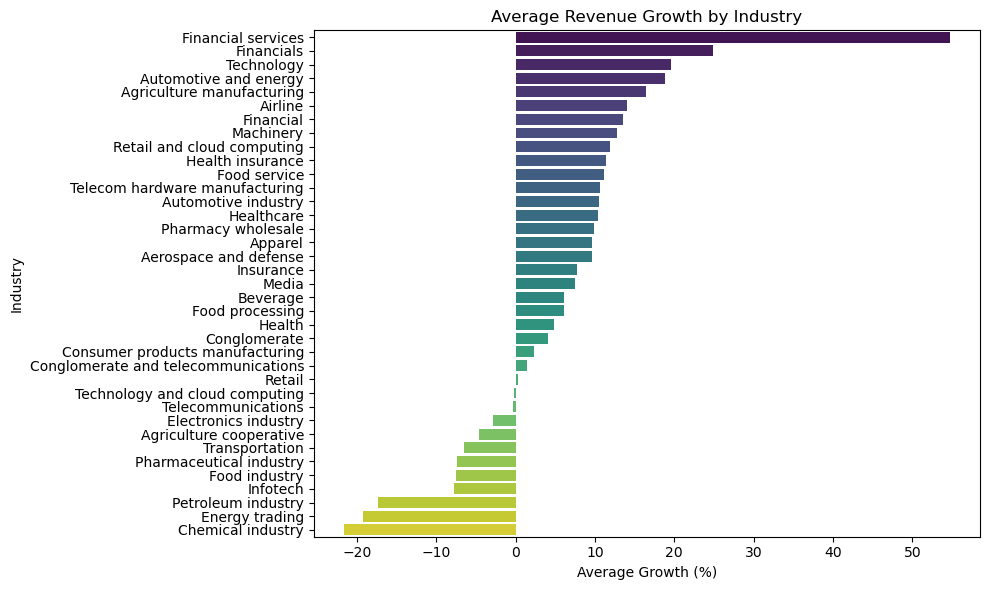

In [22]:
# Visualizing Top Industries by Average Growth
plt.figure(figsize=(10, 6))
sns.barplot(y=industry_growth.index, x=industry_growth.values, palette="viridis")
plt.title("Average Revenue Growth by Industry")
plt.xlabel("Average Growth (%)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

In [23]:
# Results
print("Top 5 Companies by Revenue Growth:")
print(top_growth[["Name", "Revenue growth"]])

print("\nBottom 5 Companies by Revenue Growth:")
print(bottom_growth[["Name", "Revenue growth"]])

Top 5 Companies by Revenue Growth:
               Name  Revenue growth
64           Nvidia           125.9
34    Goldman Sachs            57.8
20        Citigroup            55.1
11   JPMorgan Chase            54.7
17  Bank of America            49.4

Bottom 5 Companies by Revenue Growth:
                        Name  Revenue growth
28             Valero Energy           -18.8
92  World Kinect Corporation           -19.2
98      Dow Chemical Company           -21.6
67            ConocoPhillips           -28.7
68                    Pfizer           -41.7


# Employee Insights

In [24]:
# Total Employees by Industry
industry_employees = load_data.groupby("Industry")["Employees"].sum().sort_values(ascending=False)

In [25]:
# Revenue Per Employee Calculation
load_data["Revenue per Employee"] = load_data["Revenue (USD millions)"] / load_data["Employees"]

In [26]:
# Top Companies by Revenue per Employee
top_revenue_per_employee = load_data.sort_values(by="Revenue per Employee", ascending=False).head(5)

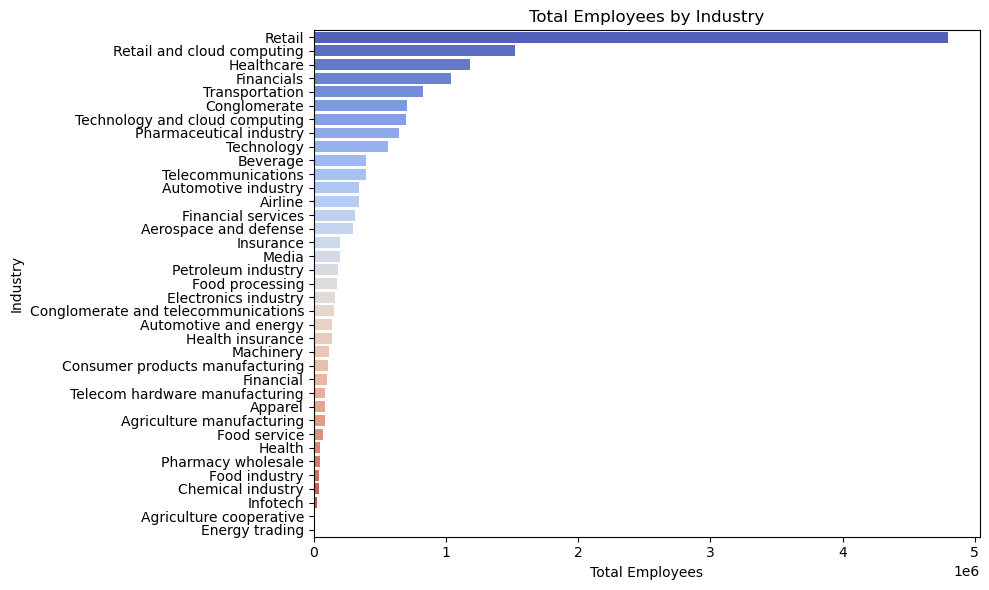

In [27]:
# Visualizing Total Employees by Industry
plt.figure(figsize=(10, 6))
sns.barplot(y=industry_employees.index, x=industry_employees.values, palette="coolwarm")
plt.title("Total Employees by Industry")
plt.xlabel("Total Employees")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

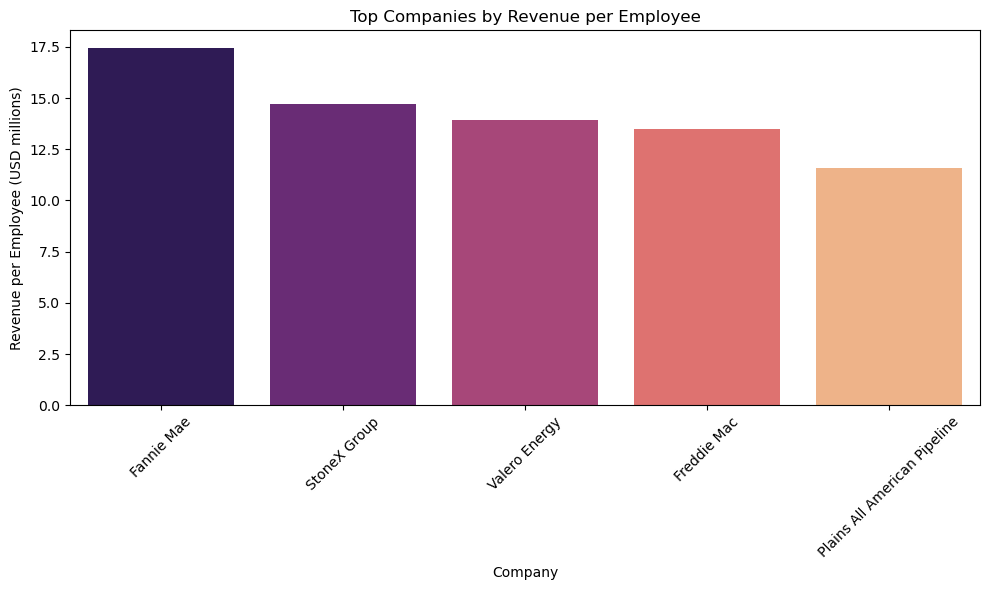

In [28]:
# Visualizing Revenue per Employee for Top Companies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_revenue_per_employee["Name"], y=top_revenue_per_employee["Revenue per Employee"], palette="magma")
plt.title("Top Companies by Revenue per Employee")
plt.xlabel("Company")
plt.ylabel("Revenue per Employee (USD millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Results
print("\nTotal Employees by Industry:")
print(industry_employees)

print("\nTop 5 Companies by Revenue per Employee:")
print(top_revenue_per_employee[["Name", "Revenue per Employee"]])


Total Employees by Industry:
Industry
Retail                                 4799750
Retail and cloud computing             1525000
Healthcare                             1184620
Financials                             1040903
Transportation                          828950
Conglomerate                            706500
Technology and cloud computing          700102
Pharmaceutical industry                 643500
Technology                              563717
Beverage                                397100
Telecommunications                      392500
Automotive industry                     340000
Airline                                 338400
Financial services                      309926
Aerospace and defense                   293000
Insurance                               200216
Media                                   199125
Petroleum industry                      184673
Food processing                         173825
Electronics industry                    161000
Conglomerate and tele

# Headquarters Analysis

In [30]:
# Count of Companies by Headquarters
hq_count = load_data["Headquarters"].value_counts()

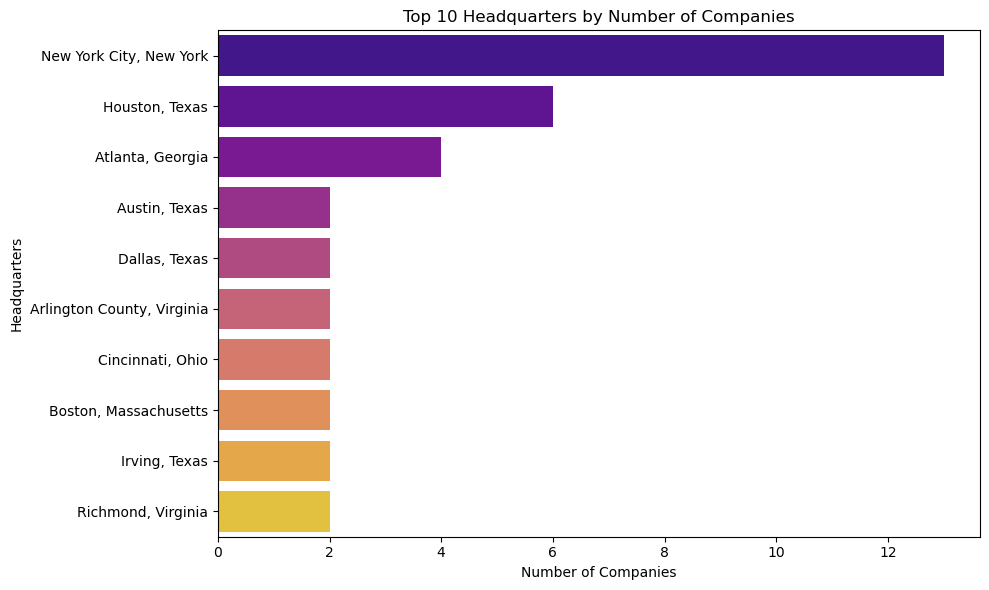

In [31]:
# Visualizing Count of Companies by Headquarters
plt.figure(figsize=(10, 6))
sns.barplot(y=hq_count.index[:10], x=hq_count.values[:10], palette="plasma")
plt.title("Top 10 Headquarters by Number of Companies")
plt.xlabel("Number of Companies")
plt.ylabel("Headquarters")
plt.tight_layout()
plt.show()

In [32]:
# Results
print("\nTop Headquarters by Number of Companies:")
print(hq_count.head(10))


Top Headquarters by Number of Companies:
New York City, New York       13
Houston, Texas                 6
Atlanta, Georgia               4
Austin, Texas                  2
Dallas, Texas                  2
Arlington County, Virginia     2
Cincinnati, Ohio               2
Boston, Massachusetts          2
Irving, Texas                  2
Richmond, Virginia             2
Name: Headquarters, dtype: int64


# Industry Performance

In [33]:
# Aggregate Metrics by Industry
industry_performance = load_data.groupby("Industry").agg({
    "Revenue (USD millions)": "sum",
    "Revenue growth": "mean",
    "Employees": "sum"
}).rename(columns={
    "Revenue (USD millions)": "Total Revenue (USD millions)",
    "Revenue growth": "Average Revenue Growth (%)",
    "Employees": "Total Employees"
}).sort_values(by="Total Revenue (USD millions)", ascending=False)

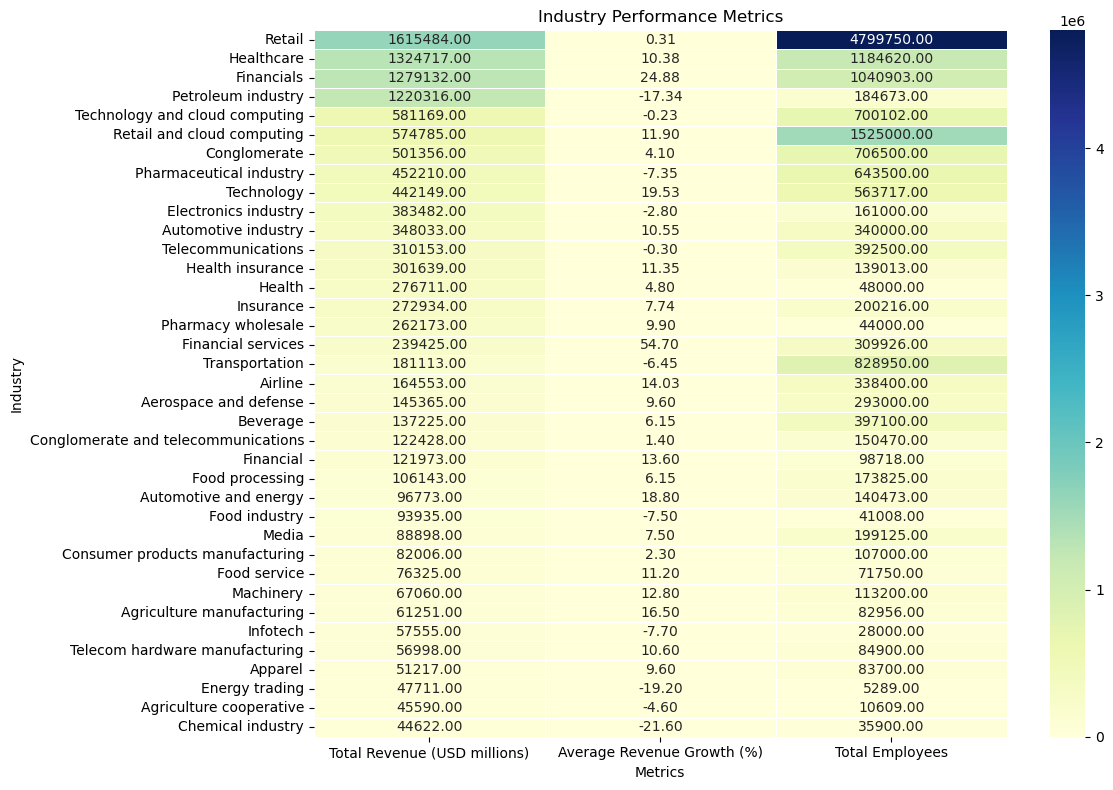

In [34]:
# Visualizing Industry Performance Metrics
plt.figure(figsize=(12, 8))
sns.heatmap(industry_performance, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title("Industry Performance Metrics")
plt.ylabel("Industry")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()

In [35]:
# Results
print("\nIndustry Performance Metrics:")
print(industry_performance)


Industry Performance Metrics:
                                     Total Revenue (USD millions)  \
Industry                                                            
Retail                                                  1615484.0   
Healthcare                                              1324717.0   
Financials                                              1279132.0   
Petroleum industry                                      1220316.0   
Technology and cloud computing                           581169.0   
Retail and cloud computing                               574785.0   
Conglomerate                                             501356.0   
Pharmaceutical industry                                  452210.0   
Technology                                               442149.0   
Electronics industry                                     383482.0   
Automotive industry                                      348033.0   
Telecommunications                                       310153.0   
Hea

In [36]:
# Identify Top-Performing Industry
top_industry_by_revenue = industry_performance.sort_values(by="Total Revenue (USD millions)", ascending=False).head(1)
top_industry_by_growth = industry_performance.sort_values(by="Average Revenue Growth (%)", ascending=False).head(1)
top_industry_by_employees = industry_performance.sort_values(by="Total Employees", ascending=False).head(1)

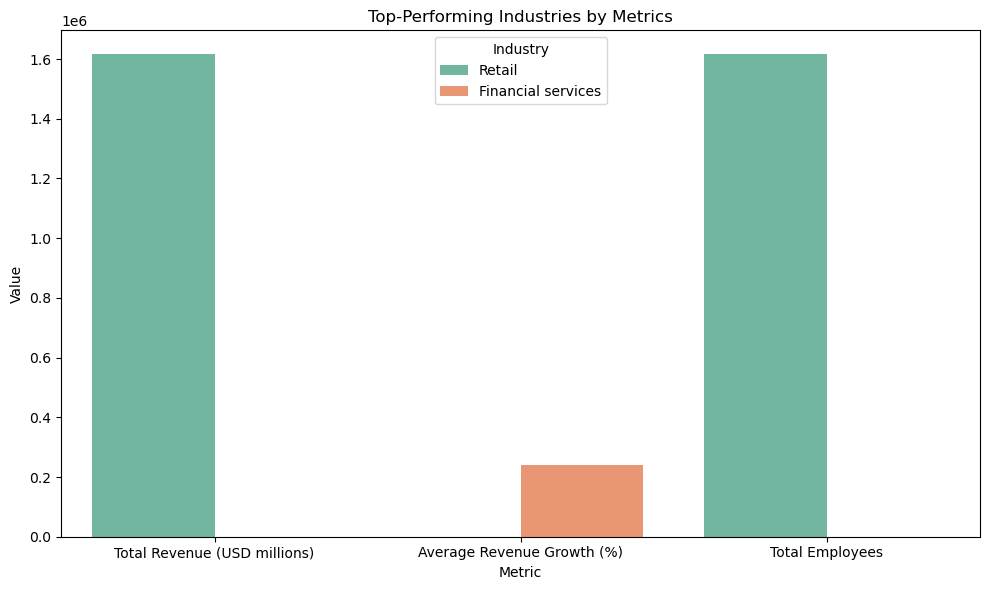

In [37]:
# Visualizing Top-Performing Industries
top_industry_metrics = pd.concat([
    top_industry_by_revenue.assign(Metric="Total Revenue (USD millions)"),
    top_industry_by_growth.assign(Metric="Average Revenue Growth (%)"),
    top_industry_by_employees.assign(Metric="Total Employees")
])

# Reset index for easy plotting
top_industry_metrics.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_industry_metrics, 
    x="Metric", 
    y="Total Revenue (USD millions)", 
    hue="Industry", 
    palette="Set2"
)
plt.title("Top-Performing Industries by Metrics")
plt.ylabel("Value")
plt.xlabel("Metric")
plt.legend(title="Industry")
plt.tight_layout()
plt.show()
